In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

In [2]:
## Objective function
def real_func(x):
    return np.sin(2*np.pi*x)

In [3]:
## Polynomial function
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

In [4]:
## Residual function
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [5]:
## Linear regression
def fitting(M = 0):
    p_init = np.random.rand(M + 1) # Random initialization
    p_lsq = leastsq(residuals_func, p_init, args = (x, y)) # Least-squares error
    print('Fitting parameters:', p_lsq[0])
    
    # Visualization
    plt.plot(x_points, real_func(x_points), label = 'real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label = 'fitted curve')
    plt.plot(x, y, 'bo', label = 'data point')
    plt.legend()
    return p_lsq

In [6]:
## Example
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)
y_real = real_func(x)
y = [np.random.normal(0, 0.1) + i for i in y_real]
regu = 0.001

Fitting parameters: [0.03729795]


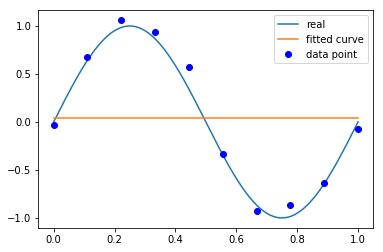

In [7]:
# M = 0
p_lsq_0 = fitting(M = 0)

Fitting parameters: [-1.40361253  0.73910421]


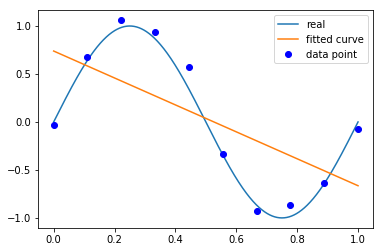

In [8]:
# M = 1
p_lsq_1 = fitting(M = 1)

Fitting parameters: [ 21.62481168 -32.94492351  11.411548    -0.08363584]


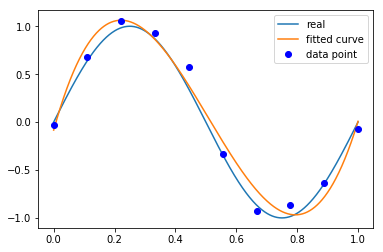

In [9]:
# M = 3
p_lsq_3 = fitting(M = 3)

Fitting parameters: [-1.61935252e+04  7.64440257e+04 -1.51348781e+05  1.62950578e+05
 -1.03460470e+05  3.92970530e+04 -8.62124979e+03  9.67710715e+02
 -3.53849202e+01 -2.67217200e-02]


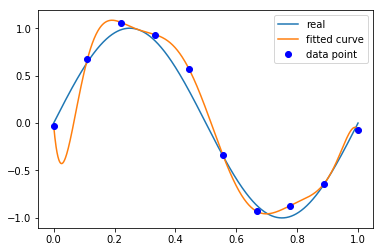

In [10]:
# M = 9
p_lsq_9 = fitting(M = 9)

In [11]:
## Ridge regression
def residuals_func_ridge(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regu*np.square(p))) # Ridge
    return ret

In [12]:
## LASSO regression
def residuals_func_lasso(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(regu*abs(p))) # LASSO
    return ret

In [13]:
p_init = np.random.rand(9 + 1) # Random initialization
p_lsq_ridge = leastsq(residuals_func_ridge, p_init, args = (x, y))
p_lsq_lasso = leastsq(residuals_func_lasso, p_init, args = (x, y))

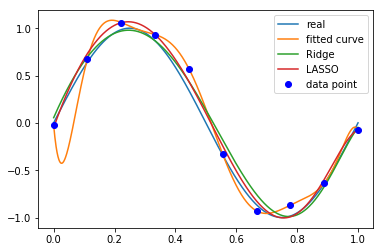

In [14]:
plt.plot(x_points, real_func(x_points), label = 'real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label = 'fitted curve')
plt.plot(x_points, fit_func(p_lsq_ridge[0], x_points), label = 'Ridge')
plt.plot(x_points, fit_func(p_lsq_lasso[0], x_points), label = 'LASSO')
plt.plot(x, y, 'bo', label = 'data point')
plt.legend()